In [16]:
import pandas as pd
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense

In [17]:
df=pd.read_csv('data.csv')

In [18]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [19]:
df=df.drop(['Unnamed: 32','id'],axis=1)

In [20]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


<AxesSubplot:xlabel='diagnosis', ylabel='count'>

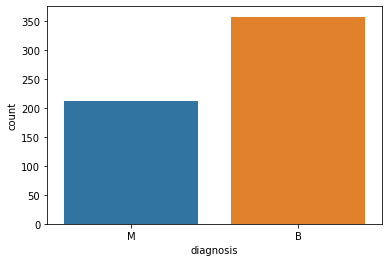

In [21]:
sns.countplot(x='diagnosis' , data=df)

In [22]:
df['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

## Divide Dataset into dependent and independent variable

In [27]:
X=df.drop('diagnosis',axis=1)
Y=df[['diagnosis']]

In [30]:
print("Shape of independent Variables",X.shape)
print("Shape of dependent varaible",Y.shape)

Shape of independent Variables (569, 30)
Shape of dependent varaible (569, 1)


In [41]:
col_name=["diagonsis"]

### Here target variable is categorical so apply encoding technique

In [42]:
from sklearn.preprocessing import LabelEncoder
lAB1=LabelEncoder()    # make object of label encoder
Y=lAB1.fit_transform(Y)
Y1=pd.DataFrame(columns=col_name,data=Y)

In [43]:
Y1

,diagonsis
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [ ]:
X.col

## MinMax scalling 

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
minmax=MinMaxScaler()

In [60]:
X=minmax.fit_transform(X)

In [61]:
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

## Train_testing spliting data

In [44]:
from sklearn.model_selection import train_test_split

In [62]:
x_train,x_test,y_train,y_test=train_test_split(X,Y1,test_size=0.2,random_state=65)

In [63]:
print(x_train.shape,y_train.shape)
print(x_test.shape,y_test.shape)

(455, 30) (455, 1)
(114, 30) (114, 1)


## Implement  ANN model on traning Data

In [69]:
# First ADD input layer and hidden layer
Ann1=Sequential()
Ann1.add(Dense(units=16,activation='relu',input_dim=30))

Ann1.add(Dense(units=16,activation='relu'))       #Add second hidden layer

Ann1.add(Dense(units=1,activation='sigmoid'))         #Output layer

In [70]:
Ann1.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

## Model is ready and now Fit on traning data

In [75]:
Ann1.fit(x_train,y_train, batch_size=100,epochs=100)

Epoch 1/100
5/5 [==============================] - 0s 2ms/step - loss: 0.1037 - accuracy: 0.9736
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 0.1016 - accuracy: 0.9736
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 0.1009 - accuracy: 0.9736
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0998 - accuracy: 0.9736
Epoch 5/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0996 - accuracy: 0.9692
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0977 - accuracy: 0.9736
Epoch 7/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0972 - accuracy: 0.9758
Epoch 8/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0959 - accuracy: 0.9736
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0950 - accuracy: 0.9736
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0944 - accuracy: 0.9714
Epoch 11/100
5/5 [===========

5/5 [==============================] - 0s 3ms/step - loss: 0.0654 - accuracy: 0.9846
Epoch 85/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0651 - accuracy: 0.9802
Epoch 86/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0649 - accuracy: 0.9846
Epoch 87/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0649 - accuracy: 0.9846
Epoch 88/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0644 - accuracy: 0.9846
Epoch 89/100
5/5 [==============================] - 0s 4ms/step - loss: 0.0644 - accuracy: 0.9846
Epoch 90/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0642 - accuracy: 0.9824
Epoch 91/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0639 - accuracy: 0.9846
Epoch 92/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0639 - accuracy: 0.9846
Epoch 93/100
5/5 [==============================] - 0s 3ms/step - loss: 0.0641 - accuracy: 0.9802
Epoch 94/100
5/5 [===============

# Accuracy on test Data

In [77]:
y_pred=Ann1.predict(x_test)
y_pred=(y_pred>0.5)

4/4 [==============================] - 0s 2ms/step


In [78]:
from sklearn.metrics import confusion_matrix

In [79]:
con1=confusion_matrix(y_test,y_pred)

<AxesSubplot:>

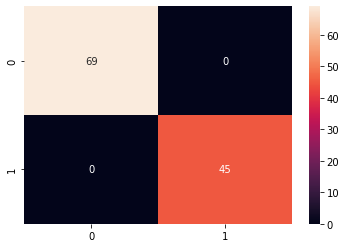

In [80]:
sns.heatmap(con1,annot=True)
